In [1]:
# First we have to import the libraries
import pandas as pd
import numpy as np

In [45]:
# Here we are going to import the first benign dataset fron 'data' folder
benign = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_benign.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 0 for all the rows
benign['class'] = 0 # This is because we assume that all the data dns traffic in that dataset is benign

# Now we are going to import the first malicious dataset from 'data' folder
malicious = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_compressed.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 1 for all the rows
malicious['class'] = 1 # This is because we assume that all the data dns traffic in that dataset is malicious

# Now we are going to merge both the datasets
data_merged = pd.concat([benign, malicious])


In [46]:
# To avoid bias we are going to shuffle the dataset
data = data_merged.sample(frac=1).reset_index(drop=True)

In [47]:
# After preparing the dataset, lets import sklearn libraries. In this project we are going to use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Before splitting the dataset, we have to clean the dataset. 
# Firs we are going to remove the columns "longest_word" and "sld"
data = data.drop(['longest_word', 'sld', 'timestamp'], axis=1)

# Then lets remove NaN values from the dataset
data = data.dropna()

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,class
0,11,0,0,9,0,2.375000,2,2,7,5.000000,8,0,0
1,14,0,0,13,0,3.286216,1,2,11,6.500000,12,0,0
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,1
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,1
4,10,0,0,9,0,2.120590,1,2,6,4.500000,7,0,0


In [48]:
# Lets normalize the numerical data
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the data on the scaler object
data[['FQDN_count', 'subdomain_length', 'entropy', 'len']] = scaler.fit_transform(data[['FQDN_count', 'subdomain_length', 'entropy', 'len']])

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,class
0,0.264706,0.000000,0,9,0,0.539268,2,2,7,5.000000,0.193548,0,0
1,0.352941,0.000000,0,13,0,0.767205,1,2,11,6.500000,0.322581,0,0
2,0.705882,0.391304,0,10,10,0.631156,6,6,7,3.500000,0.354839,1,1
3,0.735294,0.434783,0,10,11,0.588151,6,6,7,3.666667,0.387097,1,1
4,0.235294,0.000000,0,9,0,0.475628,1,2,6,4.500000,0.161290,0,0


In [49]:
# Now lets split the dataset into training and testing data
X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now lets create the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# Now lets train the model
model.fit(X_train, y_train)

# Now lets test the model
y_pred = model.predict(X_test)

# Now lets check the accuracy of the model
accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8552640932679321


In [51]:
# Now lets perform cross validation to be sure we are not overfitting the model

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on your data
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the mean cross-validation score
print("Mean CV score: {:.2f}".format(cv_scores.mean())) # This is the mean accuracy of the model and as seen it is 0.85, which is close to the accuracy of the model, so we can say that we are not overfitting the model on the training data and it will do well on the testing new data

Mean CV score: 0.85


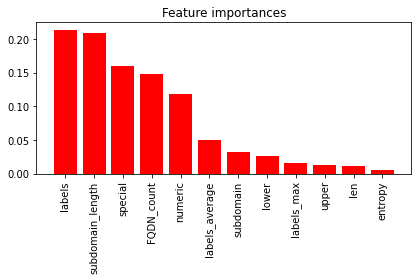

In [50]:
import matplotlib.pyplot as plt

# Now lets plot the feature importance to understand which features are more important
importances = model.feature_importances_

# get the names of the features
feature_names = X_train.columns.values

# sort the features by their importance score in descending order
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()